## Обробка та аналіз БМД
  
**Лабораторна робота №8**  
**Дисперсійний аналіз**  
виконала студентка групи БС-81  
Соловйова Анастасія

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

1.Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [4]:
df = pd.DataFrame({
    "Group1":[7, 9, 8, 5, 6, 7],
    "Group2":[8, 5, 7, 4, 6, 8],
    "Group3":[5, 3, 5, 6, 2, 4]
})
df.index.name = 'n'
n = df.shape[0]

df

,Group1,Group2,Group3
n,,,
0,7,8,5
1,9,5,3
2,8,7,5
3,5,4,6
4,6,6,2
5,7,8,4


In [7]:
s1=sum(df.iloc[:,0]/n)
s2=sum(df.iloc[:,1]/n)
s3=sum(df.iloc[:,2]/n)

sd1=df.iloc[:,0].std()
sd2=df.iloc[:,1].std()
sd3=df.iloc[:,2].std()

new_df = pd.DataFrame({
    "Group1":[7, 9, 8, 5, 6, 7],
    "Group2":[8, 5, 7, 4, 6, 8],
    "Group3":[5, 3, 5, 6, 2, 4]
})

new_df.index.name = 'n'
new_df.loc["Середнє"] = [s1,s2,s3]
new_df.loc["Стандартне відхилення"] = [sd1,sd2,sd3]
new_df

,Group1,Group2,Group3
n,,,
0,7.000000,8.000000,5.000000
1,9.000000,5.000000,3.000000
2,8.000000,7.000000,5.000000
3,5.000000,4.000000,6.000000
4,6.000000,6.000000,2.000000
5,7.000000,8.000000,4.000000
Середнє,7.000000,6.333333,4.166667
Стандартне відхилення,1.414214,1.632993,1.471960


2.Побудувати графік розкиду в групах.

[]

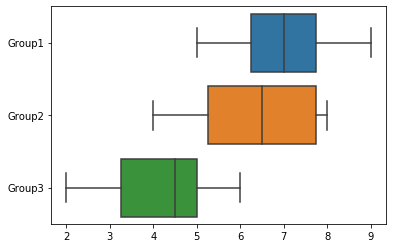

In [8]:
sns.boxplot(data=df, orient='h').set()

3.Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [9]:
def DispersialAnalys(data):
    c = len(data.columns)
    n = len(data)
    N = c*n
    SS_f = sum([data[i].sum()**2 for i in data.columns])/n - sum([data[i].sum() for i in data.columns])**2/N
    SS_z = - sum([data[i].sum() for i in data.columns])**2/N
    for i in range(c):
        for j in range(n):
            SS_z += (data[data.columns[i]][j])**2
    SS_v = SS_z - SS_f
    d_f = c - 1
    d_z = N - 1
    d_v = d_z - d_f
    MS_f = SS_f/d_f
    MS_v = SS_v/d_v 
    F_empir = MS_f/MS_v
    fisher = pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx")
    ind1 = 0
    ind2 = 0
    for i in range(1, fisher.shape[0]-10):
        if(fisher.iloc[i,0] <= d_v ):
            ind1 = i
    if (fisher.iloc[fisher.shape[0]-2, 0] < d_v ):
        ind1 = fisher.shape[0]-1
    for i in range(1, fisher.shape[1]-1):
        if(fisher.iloc[i,0] <= d_f):
            ind2 = i
    if (fisher.iloc[fisher.shape[1]-2, 0] < d_f):
        ind2 = fisher.shape[2]-1
    F_krit = fisher.iloc[ind1, ind2]
    indexes = ["SSфакт", "SSзаг", "SSвип", "dфакт", "dзаг", "dвип", "MSфакт", "MSвип", "Fемпір", "Fкрит"]
    values = [SS_f, SS_z, SS_v, d_f, d_z, d_v , MS_f, MS_v, F_empir, F_krit]
    DF = pd.DataFrame({
        "Values": np.round(values, 2)},
        index = indexes
    )
    print(DF)
    if F_empir < F_krit:
        return "Рівність середніх підтверджена"
    else: 
        return "Рівність середніх не підтверджена"

4.Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.  
5.Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [10]:
DispersialAnalys(df)

        Values
SSфакт   26.33
SSзаг    60.50
SSвип    34.17
dфакт     2.00
dзаг     17.00
dвип     15.00
MSфакт   13.17
MSвип     2.28
Fемпір    5.78
Fкрит     3.68


'Рівність середніх не підтверджена'

### Висновок
- Під час дисперсійного аналізу було отримано результат, який дозволяє відхилити нульову гіпотезу про рівність середніх та прийняти альтернативну гіпотезу про їхню відмінність, оскільки розрахований критерій Фішера виявився більший за критичний для відповідних ступеней свободи.